3) iris

In [1]:
import seaborn as sns

#붓꽃 데이터셋 로딩

iris = sns.load_dataset("iris")

iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [2]:
#품종 확인

iris['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [3]:
from sklearn.preprocessing import LabelEncoder

import pandas as pd

X=iris.iloc[:, :4].values # 독립변수

y=iris.iloc[:,4].values  #종속변수

print(y[:5])

encoder=LabelEncoder() #문자열에 label을 붙임

y1=encoder.fit_transform(y)

print(y1[:5])

y2=pd.get_dummies(y1).values #종속변수에 대한 원핫인코딩 처리

print(y2[:5])

['setosa' 'setosa' 'setosa' 'setosa' 'setosa']
[0 0 0 0 0]
[[ True False False]
 [ True False False]
 [ True False False]
 [ True False False]
 [ True False False]]


In [4]:
from sklearn.model_selection import train_test_split

#학습용, 검증용 데이터셋 구분

X_train, X_test, y_train, y_test = train_test_split(X, y2, test_size=0.2, stratify=y,random_state=10)

In [5]:

from keras.models import Sequential

from keras.layers import Dense

from keras.optimizers import SGD

#모델 생성

model = Sequential() # input 4

model.add(Dense(64,input_shape=(4,),activation='relu')) # relu  64

model.add(Dense(64,activation='relu')) # relu  64

model.add(Dense(3,activation='softmax')) # output(softmax)  3

sgd = SGD(learning_rate=0.01)  # 확률적 경사하강법

model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

train       validation      test

6           2               2

훈련용      보조및튜닝      검증

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                320       
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 3)                 195       
                                                                 
Total params: 4,675
Trainable params: 4,675
Non-trainable params: 0
_________________________________________________________________


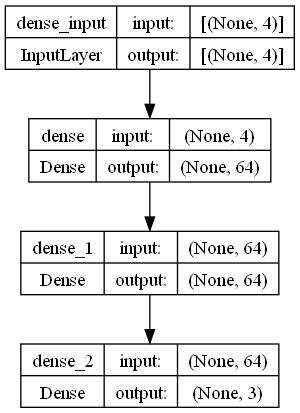

In [7]:
from keras.utils import plot_model  

plot_model(model,show_shapes=True)

In [9]:
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau, CSVLogger

es = EarlyStopping(monitor='val_loss', patience=10)

# 학습 과정에서 만들어진 최적의 파라미터 조합으로 모형을 저장

mc = ModelCheckpoint("iris_best.h5", save_best_only=True)

# 학습이 잘 안될 때 학습률을 동적으로 조절하는 옵션

rlr = ReduceLROnPlateau(factor=0.1, patience=5) #기존 학습률*factor (배수)

# 학습 과정의 주요 history를 csv로 저장
csvlogger = CSVLogger("mylog.csv")  

hist = model.fit(X_train, y_train, validation_split=0.2, epochs=100, callbacks=[es, mc, rlr, csvlogger])

Epoch 1/100
3/3 [==============================] - 1s 117ms/step - loss: 1.0999 - accuracy: 0.3229 - val_loss: 1.1421 - val_accuracy: 0.3333 - lr: 0.0100
Epoch 2/100
3/3 [==============================] - 0s 35ms/step - loss: 0.9954 - accuracy: 0.3646 - val_loss: 1.0302 - val_accuracy: 0.1667 - lr: 0.0100
Epoch 3/100
3/3 [==============================] - 0s 32ms/step - loss: 0.9373 - accuracy: 0.4896 - val_loss: 0.9594 - val_accuracy: 0.8333 - lr: 0.0100
Epoch 4/100
3/3 [==============================] - 0s 32ms/step - loss: 0.9122 - accuracy: 0.7604 - val_loss: 0.9221 - val_accuracy: 0.8750 - lr: 0.0100
Epoch 5/100
3/3 [==============================] - 0s 34ms/step - loss: 0.8850 - accuracy: 0.8958 - val_loss: 0.8683 - val_accuracy: 0.9167 - lr: 0.0100
Epoch 6/100
3/3 [==============================] - 0s 36ms/step - loss: 0.8663 - accuracy: 0.8229 - val_loss: 0.8561 - val_accuracy: 0.8333 - lr: 0.0100
Epoch 7/100
3/3 [==============================] - 0s 35ms/step - loss: 0.8485 - 

In [10]:
from keras.models import load_model

model=load_model('iris_best.h5')  

model.evaluate(X_test, y_test, verbose=0)

[0.29023006558418274, 0.9666666388511658]

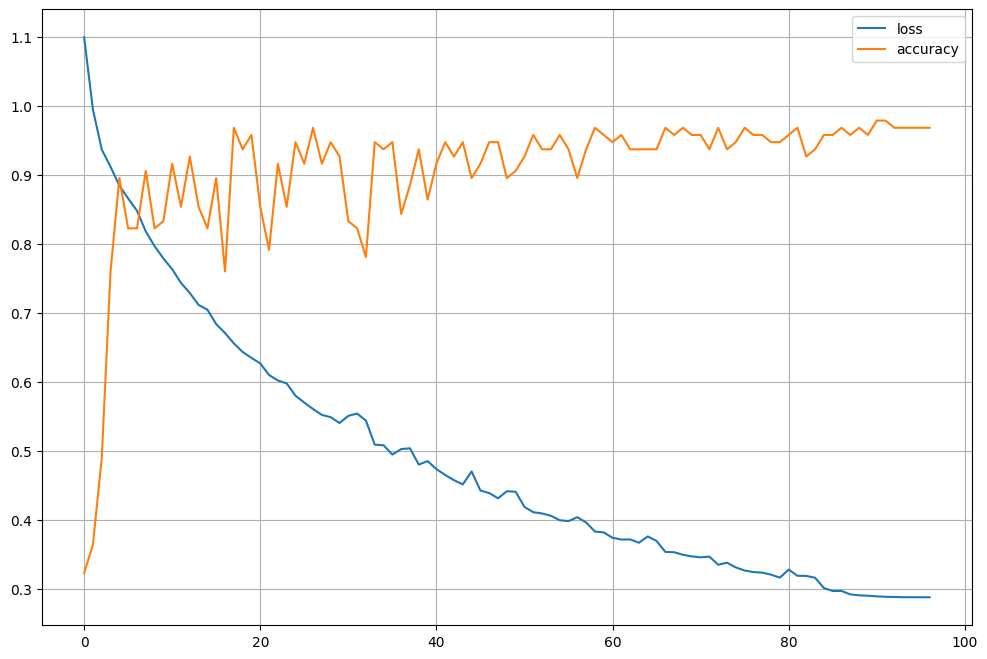

In [11]:
import matplotlib.pyplot as plt

#그래프 출력

plt.figure(figsize=(12,8))

plt.plot(hist.history['loss']) #손실률

plt.plot(hist.history['accuracy']) #정확도

plt.legend(['loss','accuracy'])

plt.grid()

plt.show()

In [12]:
#모델 평가

loss, accuracy = model.evaluate(X_test, y_test,  verbose=0)

print("정확도 = {:.2f}".format(accuracy))

정확도 = 0.97


In [13]:
import numpy as np

from sklearn.metrics import confusion_matrix

pred = model.predict(X_test)

print(pred[:10])

y_test_class = np.argmax(y_test,axis=1)

pred_class = np.argmax(pred,axis=1)

print(y_test_class[:10])

print(pred_class[:10])

print(confusion_matrix(y_test_class,pred_class))

1/1 [==============================] - 0s 73ms/step
[[1.9338882e-02 5.4678982e-01 4.3387124e-01]
 [9.1915649e-01 7.8659289e-02 2.1842010e-03]
 [1.7499760e-02 4.7102579e-01 5.1147443e-01]
 [7.9539251e-03 4.1961947e-01 5.7242656e-01]
 [8.7658189e-02 6.9227183e-01 2.2006996e-01]
 [3.2127739e-03 2.9215315e-01 7.0463407e-01]
 [9.0165651e-01 9.4867483e-02 3.4760097e-03]
 [2.4264874e-03 2.1359268e-01 7.8398079e-01]
 [2.7861667e-03 2.3698193e-01 7.6023191e-01]
 [9.7578067e-01 2.3939060e-02 2.8026162e-04]]
[1 0 1 2 1 2 0 2 2 0]
[1 0 2 2 1 2 0 2 2 0]
[[10  0  0]
 [ 0  9  1]
 [ 0  0 10]]


In [15]:
model.save('c:/workspace/data/iris/iris.h5')